梯度下降法
===

# 1.基础概念
梯度方向是函数值变化最快的方向
- 全微分：考虑所有自变量变化时，函数值的变化情况
- 偏微分：假设其它自变量不变，考虑一个变量变化，函数值的变化情况.$\Delta{y}=\sum_{i=1}^n\frac{\partial}{\partial{x_i}}\Delta{x_i}$
- 梯度向量:所有变量偏微分组成的向量。梯度方向由L(θ)对θ的偏导数确定,所以我们需要沿着负梯度方向往下走

## 1.1.计算梯度的两种方法
还有一种方法就是在神经网络下的反向传播算法
### 1.1.1.数值梯度-Numerical Gradient
速度慢，但是简单，它是从梯度的定义出发来计算梯度的。
$$\frac{f(x+h)-f(x)}{h}$$

In [2]:
import numpy as np
'''
一个最基本的计算x点上f的梯度的算法
f : 参数为x的一个函数
x : 一个numpy的vector
'''
def eval_numerical_gradient(f,x):
    fx = f(x) # 计算原始点上的函数值
    grad = np.zeros(x.shape)
    h = 0.00001
    
    # 对x的每一个维度都计算一遍
    it = np.nditer(g, flag=['multi_index'], op_flag=['readwrite'])
    while not it.finished:
        
        # 计算x+h处的函数值
        ix = it.multi_index
        old_value = x[ix]
        x[ix] = old_value + h
        fxh = f(x)
        x[ix] = old_value
        
        # 计算偏导数
        grad[ix] = (fxh - fx) / h # 斜率
        it.iternext()
    return grad

### 1.1.2.解析梯度-Analytic Gradient
速度快，但是更容易出错。首先需要求出来$\frac{\partial{f}}{\partial{x}}$，然后在计算。可是有些复杂函数根本不能求偏导数

# 2.梯度下降法
梯度下降法的思路就是找到负梯度方向，然后不停的以一个很小的间隔去向它移动，直到前后两次的高度差小于一定范围的时候，停止，这个时候可以求出m和b.梯度下降法更新参数的公式如下：
$$\begin{eqnarray}
\theta&:=&\theta - \alpha\frac{\partial}{\partial{\theta}}J(\theta)\\
\theta_j&:=&\theta_j-\frac{1}{m}\sum_{i=0}^m(\theta_i*x_i-y_i)*x_i*\alpha
\end{eqnarray}$$
$\alpha$表示学习率，一般定义为0.001，这个参数太大了，会在底部不停震荡，如果太小，那么迭代次数太多

## 2.1.批量梯度下降算法:BGD
这种方法使用整个数据集(the complete dataset)去计算代价函数的梯度。每次使用全部数据计算梯度去更新参数，批量梯度下降法会很慢，并且很难处理不能载入内存(don’t fit in memory)的数据集。在随机初始化参数后，按如下方式计算代价函数的梯度(参照梯度下降法更新参数的公式，m是所有样本的数量和)
- 如果训练集有3亿条数据，你需要从硬盘读取全部数据到内存中；
- 每次一次计算完求和后，就进行参数更新；
- 然后重复上面每一步；
- 这意味着需要较长的时间才能收敛；
- 特别是因为磁盘输入/输出（disk I/O）是系统典型瓶颈，所以这种方法会不可避免地需要大量的读取。

![images](images/00_03_03_001.png)

Text(0.5,1,'test')

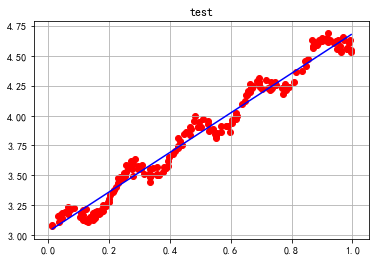

In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

def loadDataSet():
    dataLoad = pd.read_csv("data/randomcurve.txt", header=None)
    x = dataLoad.iloc[:, :2].values
    y = dataLoad.values[:, 2]
    return x, y

def BGD(xArr, yArr, iter, alpha):
    yArr = np.reshape(yArr, newshape=(-1,1))
    mu, sigma = 0, 0.1  # 均值与标准差
    weight_num = xArr.shape[1]
    w = np.random.normal(mu, sigma, (weight_num,1))
    m = xArr.shape[0]

    for i in range(iter):
        predict = xArr @ w
        grad = (xArr.T @ (predict - yArr) / m) * alpha
        w -= grad
    return w

def BGD_Call(x, y):
    ws = BGD(x,y, 10000, 0.001)
    xMat = np.mat(x)
    yMat = np.mat(y)
    xCopy = xMat.copy()
    xCopy.sort(0)
    yHat = xCopy * ws

    return (xMat, yMat), (xCopy, yHat)

x,y=loadDataSet()

(xMat, yMat), (xCopy, yHat) = BGD_Call(x,y)
plt.figure(facecolor='w')
plt.scatter([xMat[:, 1].flatten()], [yMat.T[:, 0].flatten().A[0]], c='r')

plt.plot(xCopy[:, 1], yHat, c='b')
plt.grid(True)
plt.title("test")

## 2.2.随机梯度下降算法:SGD
优先选择.每次拿到一个样本就开始梯度下降。批量梯度下降法被证明是一个较慢的算法，所以，我们可以选择随机梯度下降法达到更快的计算。随机梯度下降法的第一步是随机化整个数据集。在每次迭代仅选择一个训练样本去计算代价函数的梯度，然后更新参数。即使是大规模数据集，随机梯度下降法也会很快收敛。随机梯度下降法得到结果的准确性可能不会是最好的，但是计算结果的速度很快。在随机化初始参数之后，就开始计算梯度。如下为随机梯度下降法的伪码：(参照梯度下降法更新参数的公式，m是1)
- 进入内循环（inner loop）;
- 第一步：挑选第一个训练样本并更新参数，然后使用第二个实例；
- 第二步：选第二个训练样本，继续更新参数；
- 然后进行第三步…直到第n步；
- 直到达到全局最小值

随机梯度下降法不像批量梯度下降法那样收敛，而是游走到接近全局最小值的区域终止<br/>
![images](images/00_03_03_002.png)

## 2.3.mini-batch梯度下降算法:MBGD
小批量梯度下降法是最广泛使用的一种算法，该算法每次使用一批(batch_size)训练样本（称之为一批）进行训练，能够更快得出准确的答案。小批量梯度下降法不是使用完整数据集，在每次迭代中仅使用m个训练样本去计算代价函数的梯度。一般小批量梯度下降法所选取的样本数量在50到256个之间，视具体应用而定(参照梯度下降法更新参数的公式，m是batch_size)
- 这种方法减少了参数更新时的变化，能够更加稳定地收敛。
- 同时，也能利用高度优化的矩阵，进行高效的梯度计算。

![images](images/00_03_03_003.png)

# 3.线性回归举例
由于线性回归的损失函数是
$$J(\theta)=\frac{1}{2}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2$$
两边求导，有
$$\begin{eqnarray}
\frac{\partial{J(\theta)}}{\partial{\theta_j}}&=&\frac{\partial}{\partial{\theta_j}}\frac{1}{2}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2\\
&\Rightarrow& \sum_{i=1}^m[2*\frac{1}{2}(h_{\theta}(x)-y) \bullet \frac{\partial}{\partial{\theta_j}}(h_{\theta}(x)-y)]\\
&\Rightarrow& \sum_{i=1}^m[(h_{\theta}(x)-y) \bullet \frac{\partial}{\partial{\theta_j}}(\sum_{i=0}^n\theta_ix_i-y)]\\
&\Rightarrow& \sum_{i=1}^m[(h_{\theta}(x)-y) \bullet x_j]
\end{eqnarray}$$

假设有n个特征，表达式如下
$$h(\Theta)=\Theta_0+\Theta_1x_1+\Theta_2x_2+...+\Theta_nx_n$$
那么
$$
Repeat\{
   \Theta_j := \Theta_j - \alpha\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})x_j^{(i)}, j={0,1,...,n}
\}
$$
有
$$\begin{cases}
\Theta_0 := \Theta_0 - \alpha\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})x_0^{(i)}\\\\
\Theta_1 := \Theta_1 - \alpha\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})x_1^{(i)}\\\\
\Theta_2 := \Theta_2 - \alpha\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})x_2^{(i)}\\\\
...
\end{cases}$$

![images](images/00_03_03_004.png)
这是什么意思，首先给$\Theta_0,\Theta_1,...\Theta_n$设置初始值，基本都是1，然后中间部分一样，这个值就是用这些初始值带入m个向
量，可以得到m个值，用这m个值分别减去它们对应的y值，然后用这个值分别乘以对应记录的当前向量特征的值($\Theta_0$就是
$X_0$，$X_0$没有，就是1，$\Theta_1$就是当前记录的第一个特征的值)然后将这m个值求和,然后乘以步长，乘以$\frac{1}{m}$,这个值我们可以叫
它$\delta$。对于$\Theta_0$来说，他的下一个值就是$\Theta_0-\delta$，对于$\Theta_1$来说，他的下一个值就是$\Theta_1-\delta$...直到前后两次的高度差小于一定范围。下面三幅图分别是order为3，6，9的情况下，梯度下降法(红色)和最小二乘法(绿色)的拟合曲线

| order=3 | order=6 | order=9 |
| ------- | ------- | ------- |
| ![images](images/00_03_03_005.png) | ![images](images/00_03_03_006.png) | ![images](images/00_03_03_007.png) |